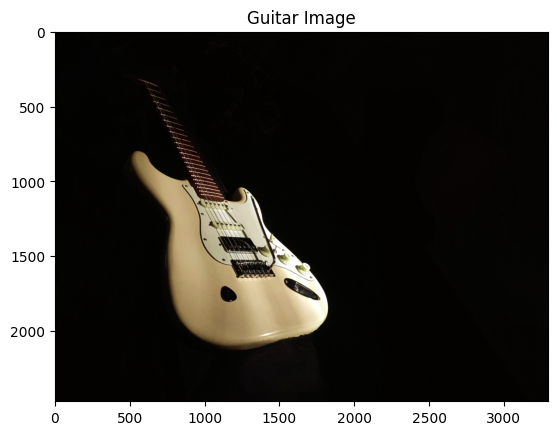

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread("Guitar.png")
plt.imshow(img)
#plt.axis("off")  # Remove axes for a cleaner look
plt.title("Guitar Image")
plt.show()


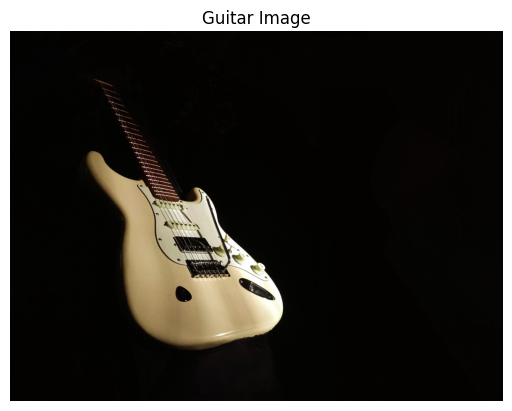

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image using Pillow
img = Image.open("Guitar.png")

# Display the image using Matplotlib
plt.imshow(img)
plt.axis("off")
plt.title("Guitar Image")
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('vgsales.csv')

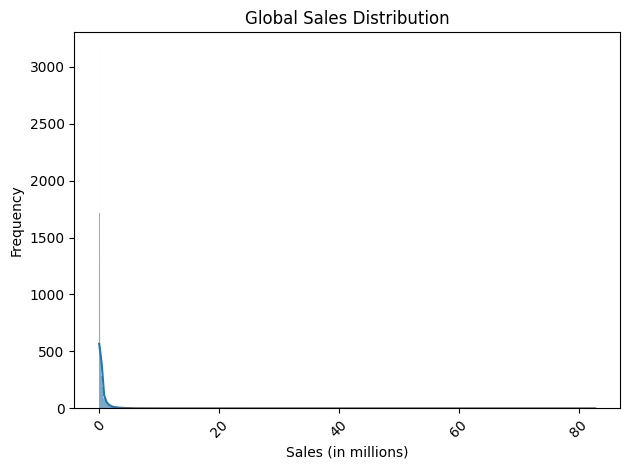

In [5]:
#Fine-tune layouts, axes, and annotations

ax = sns.histplot(data=df, x="Global_Sales", kde=True)
ax.set_title("Global Sales Distribution")
ax.set_xlabel("Sales (in millions)")
ax.set_ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

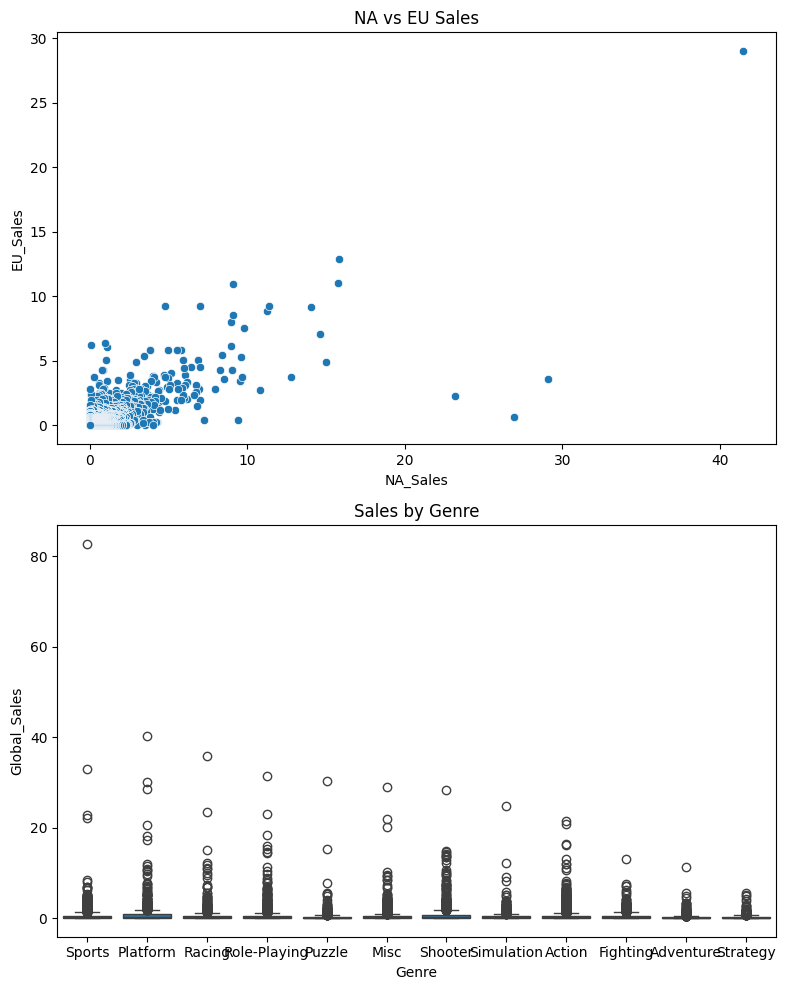

In [6]:
#Custom Subplots

fig, axs = plt.subplots(2, 1, figsize=(8, 10))
sns.scatterplot(data=df, x="NA_Sales", y="EU_Sales", ax=axs[0])
sns.boxplot(data=df, x="Genre", y="Global_Sales", ax=axs[1])
axs[0].set_title("NA vs EU Sales")
axs[1].set_title("Sales by Genre")
plt.tight_layout()
plt.show()

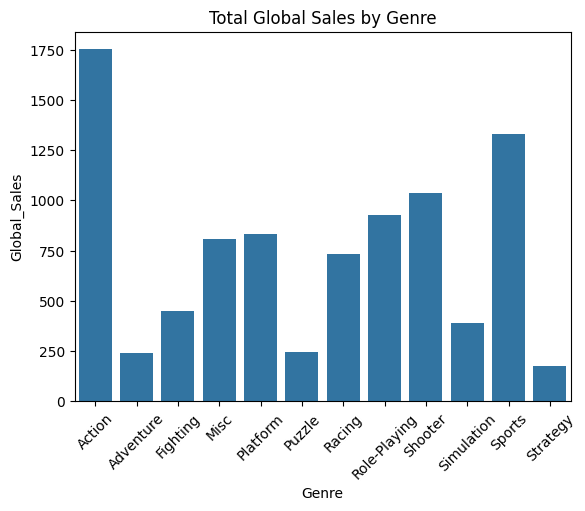

In [7]:
#Data Aggregation and Grouping

sales_by_genre = df.groupby("Genre")["Global_Sales"].sum().reset_index()
sns.barplot(data=sales_by_genre, x="Genre", y="Global_Sales")
plt.xticks(rotation=45)
plt.title("Total Global Sales by Genre")
plt.show()

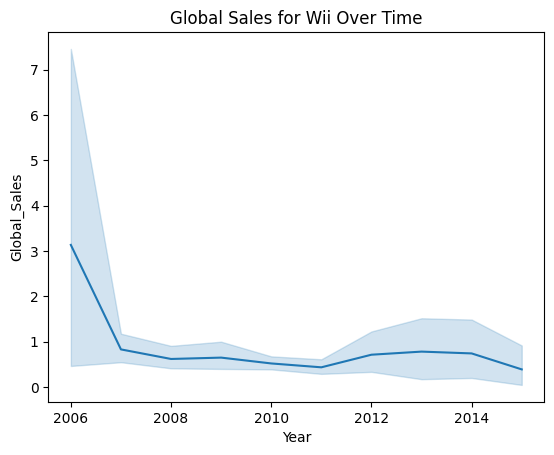

In [8]:
#Filtering Data for Subset Visualizations

filtered_df = df[df["Platform"] == "Wii"]
sns.lineplot(data=filtered_df, x="Year", y="Global_Sales")
plt.title("Global Sales for Wii Over Time")
plt.show()

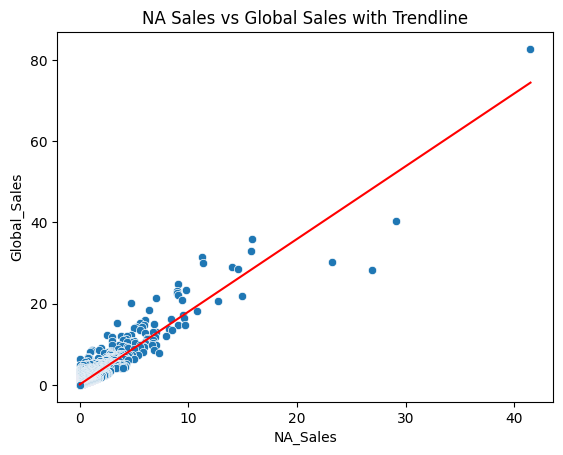

In [9]:
#Adding Trendlines or Curves

sns.scatterplot(data=df, x="NA_Sales", y="Global_Sales")
x = df["NA_Sales"]
y = df["Global_Sales"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="red")  # Add a trendline
plt.title("NA Sales vs Global Sales with Trendline")
plt.show()

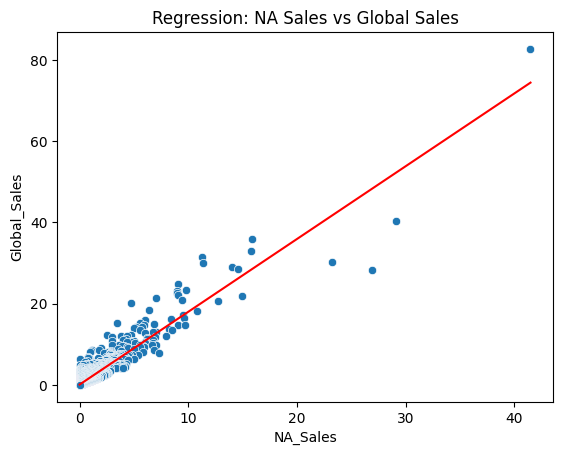

In [10]:
#Overlay Regression Results

import statsmodels.api as sm

X = sm.add_constant(df["NA_Sales"])
y = df["Global_Sales"]
model = sm.OLS(y, X).fit()
df["predicted"] = model.predict(X)

sns.scatterplot(data=df, x="NA_Sales", y="Global_Sales")
sns.lineplot(data=df, x="NA_Sales", y="predicted", color="red")
plt.title("Regression: NA Sales vs Global Sales")
plt.show()

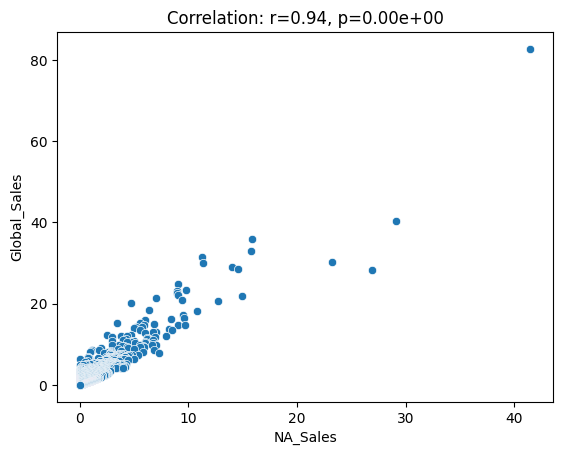

In [12]:
#Correlation Analysis

from scipy.stats import pearsonr

r, p = pearsonr(df["NA_Sales"], df["Global_Sales"])
sns.scatterplot(data=df, x="NA_Sales", y="Global_Sales")
plt.title(f"Correlation: r={r:.2f}, p={p:.2e}")
plt.show()

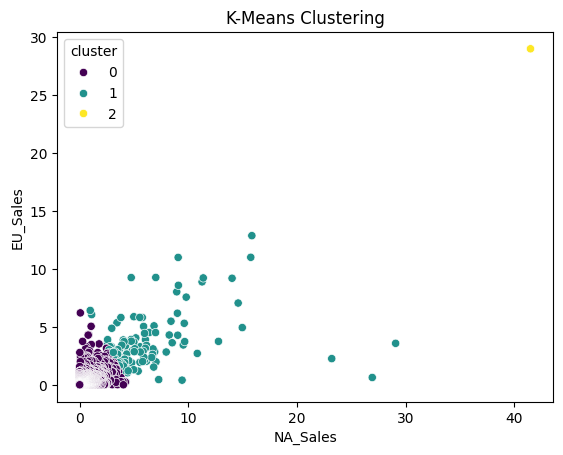

In [17]:
#K-Means Clustering Visualization

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(df[["NA_Sales", "EU_Sales"]])

sns.scatterplot(data=df, x="NA_Sales", y="EU_Sales", hue="cluster", palette="viridis")
plt.title("K-Means Clustering")
plt.show()

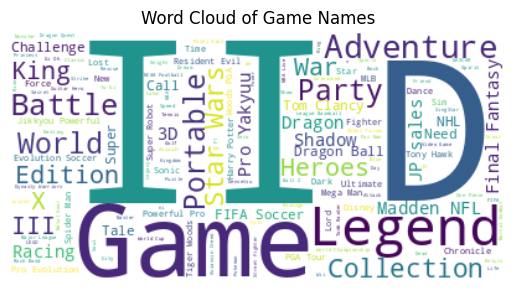

In [25]:
#Word Cloud from Game Titles

from wordcloud import WordCloud

text = " ".join(df["Name"].dropna())
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Game Names")
plt.show()

In [28]:
#Dash Application with Plotly Charts

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash(__name__)

# Create a Plotly figure
fig = px.bar(df, x="Genre", y="Global_Sales", title="Global Sales by Genre")

app.layout = html.Div([
    html.H1("Sales Dashboard"),
    dcc.Graph(figure=fig)
])

if __name__ == "__main__":
    app.run_server(debug=True)

/var/folders/t8/xq838vl509d912y3x3jrkshm0000gn/T/ipykernel_82026/1175253343.py:4: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/var/folders/t8/xq838vl509d912y3x3jrkshm0000gn/T/ipykernel_82026/1175253343.py:5: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

